In [376]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
utils = reload(utils)
pt = reload(pt)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

In [377]:
Nx, Ny, Nz = 64, 1, 64
et = 1.0

def load(Nx,Ny,et):
    base_fn = 'output_swe_vortex'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

In [378]:
N = 10
# sfx0 = 'debug_daext'
sfx0 = 'wdawloc_1.0_rhou_rhow_p0.2_tra_corr_2pi'
sfx0 = 'wdawloc_pp_rhou_rhow_tra'
sfx0 = tc.cb_suffix(1,0, '%s' %(sfx0))
# sfx = sfx0

fn_pickle = tc.get_filename(N,sfx0,format='dat')
path_pickle = tc.get_path(fn_pickle)

i2 = (slice(2,-2),slice(2,-2))

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
node = pickle.load(file)
obs = pickle.load(file)
obs_noisy = pickle.load(file)
obs_noisy_interp = pickle.load(file)
obs_mask = pickle.load(file)
obs_covar = pickle.load(file)
file.close()

In [379]:
attr = 'rhou'

print(obs[0][attr].shape)
print(obs_noisy[0][attr].shape)
print(obs_noisy_interp[0][attr].shape)
print(obs_mask[0][attr].sum())
print(obs_covar.shape)

time_len = len(obs)
print(time_len)

(68, 68)
(68, 68)
(68, 68)
2048.0
(20, 2)
20


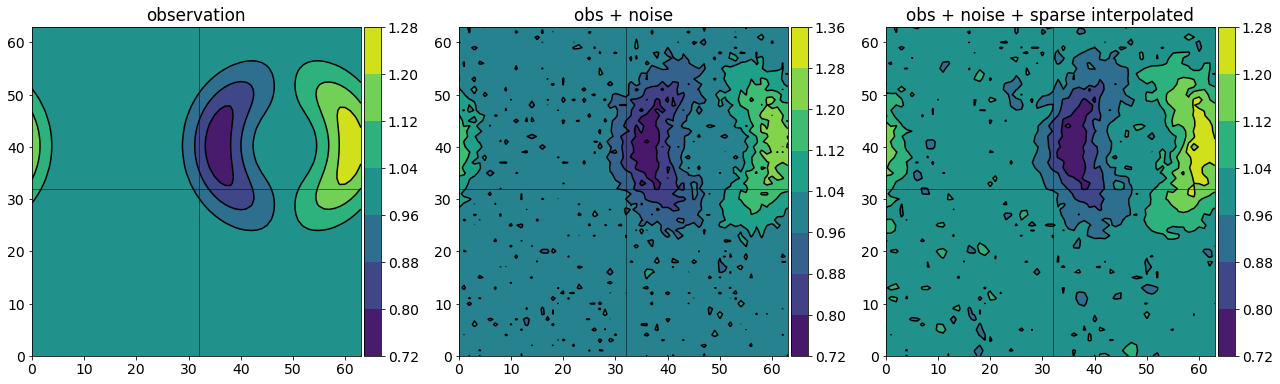

In [380]:
time_index = 3
attribute = 'rhow'
obs_arr = obs[time_index][attribute][i2].T
obs_arr = [obs_arr, 'observation']
obs_n_arr = obs_noisy[time_index][attribute][i2].T
obs_n_arr = [obs_n_arr, 'obs + noise']
obs_ni_arr = obs_noisy_interp[time_index][attribute][i2].T
obs_ni_arr = [obs_ni_arr, 'obs + noise + sparse interpolated']
obs_mask_arr = obs_mask[time_index][attribute]
# obs_mask_arr = [obs_mask_arr, 'obs_mask']

arr_lst = [obs_arr, obs_n_arr, obs_ni_arr]

ncolslen = 3
fs = (18,12)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)
_ = pl.plot(aspect='equal',method='contour')

fraction of non-zero entries: 0.5


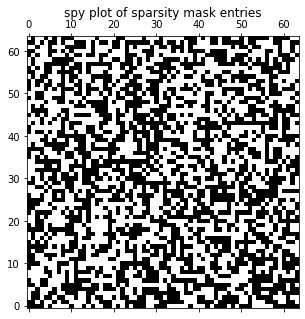

In [381]:
import matplotlib.pyplot as plt
%matplotlib inline

i2 = (slice(2,-2),slice(2,-2))

fig = plt.figure(figsize=(6,5))
plt.spy(obs_mask_arr[i2].T, origin='lower')
obs_mask_arr_shp = obs_mask_arr[i2].shape[0] * obs_mask_arr[i2].shape[1]
print("fraction of non-zero entries:", obs_mask_arr[i2].sum() / obs_mask_arr_shp)
plt.title("spy plot of sparsity mask entries")
plt.show()

In [370]:
print(obs_covar)

[[1.05740062 1.05707018]
 [1.05151854 1.05393909]
 [1.04693771 1.04380346]
 [1.03524209 1.03632061]
 [1.02968648 1.02813356]
 [1.0194632  1.02366587]
 [1.01971961 1.01966623]
 [1.01255471 1.00901332]
 [1.00443594 1.00575366]
 [0.99966502 0.99660879]
 [0.99272831 0.99566077]
 [0.99074974 0.98991994]
 [0.98110033 0.98349265]
 [0.98068321 0.98018452]
 [0.97433086 0.97191302]
 [0.96830856 0.96973363]
 [0.96583126 0.96463325]
 [0.96051477 0.96231062]
 [0.95825081 0.9570718 ]
 [0.95087824 0.95110505]]
